# 회귀 트리

* 사이킷런의 결정 트리 및 결정 트리 기반의 앙상블 알고리즘은 분류 뿐만 아니라 회귀도 가능합니다.
* 이는 트리가 **CART(Classification and Regression Tree)** 를 기반으로 만들어 졌기 때문입니다.
* CART는 분류 뿐만 아니라 회귀도 가능한 트리 분할 알고리즘입니다. 
* CART회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS가 최소가 될 수 있는 기준을 찾아서 분할 됩니다. 
* 최종 분할이 완료 된 후에 각 분할 영역에 있는 데이터 결정 값들의 평균 값으로 학습/예측합니다. 


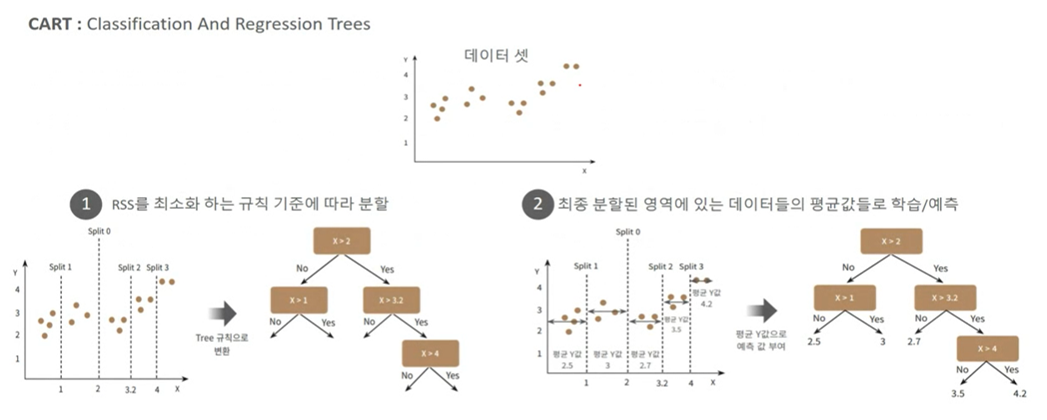

## 회귀 트리의 오버 피팅

* 회귀 트리 역시 복잡한 트리 구조를 가질 경우 오버 피팅되기 쉽습니다. 
* 트리의 크기와 노드 개수의 제한 등의 방법을 통해 오버 피팅을 개선합니다. 
* 하이퍼파라미터의 개수가 많으므로 CV와 함께 사용해서 튜닝합니다. 

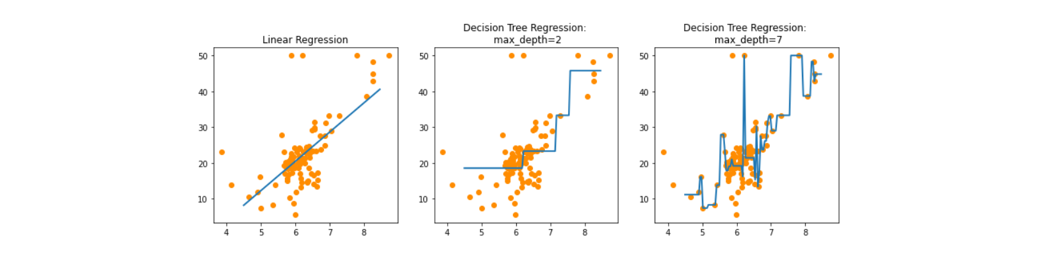

## 사이킷런의 회귀 트리 지원

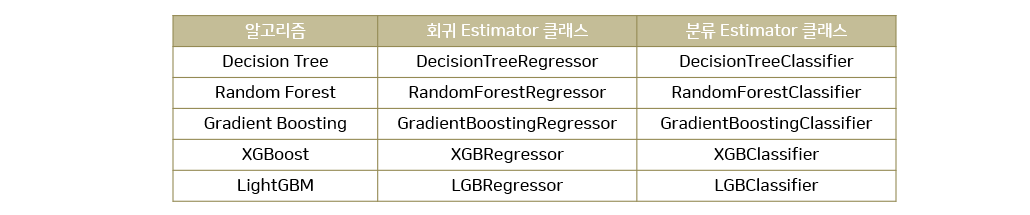

---

## 데이터 로딩

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
boston_data=boston.data
bostonDF = pd.DataFrame(data=boston_data, columns=boston.feature_names)
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [2]:
dir(boston) #객체안에 어떤 객체나 속성이 있는지 살펴볼때 

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'target']

In [3]:
boston.filename

'boston_house_prices.csv'

In [4]:
# PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE']=boston.target
bostonDF.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


[데이터 속성]
* CRIM: 지역별 범죄 발생률  
* ZN: 25,000평방피트를 초과하는 거주 지역의 비율
* NDUS: 비상업 지역 넓이 비율
* CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)
* NOX: 일산화질소 농도
* RM: 거주할 수 있는 방 개수
* AGE: 1940년 이전에 건축된 소유 주택의 비율
* DIS: 5개 주요 고용센터까지의 가중 거리
* RAD: 고속도로 접근 용이도
* TAX: 10,000달러당 재산세율
* PTRATIO: 지역의 교사와 학생 수 비율
* B: 지역의 흑인 거주 비율
* LSTAT: 하위 계층의 비율
* MEDV: 본인 소유의 주택 가격(중앙값)

## EDA

In [6]:
#통계 정보
bostonDF.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<AxesSubplot: >

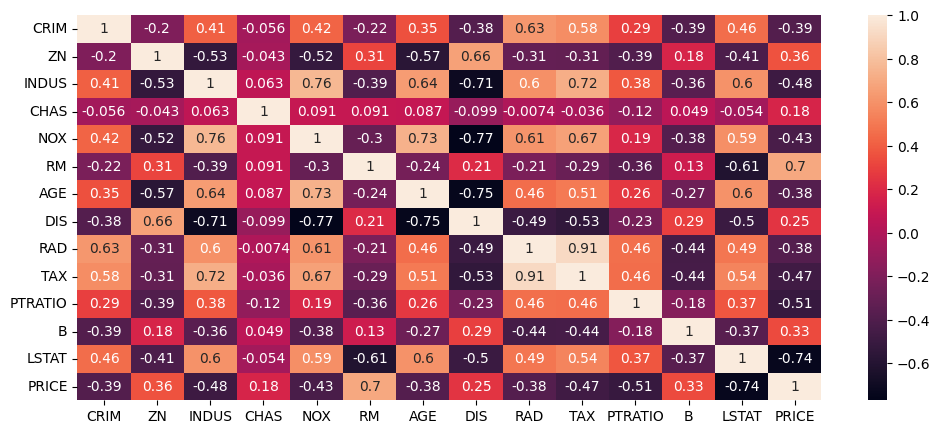

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# price와 상관관계가 높은 피처들 탐색

bostonDF.corr() #상관계수

plt.subplots(figsize = (12,5))

sns.heatmap(bostonDF.corr(),annot=True)




> LSTAT, RM,PTRATIO가 PRICE와 상관관계가 높음<br>
하위계층의 비율, 방의 개수, 교사와 학생수 비율

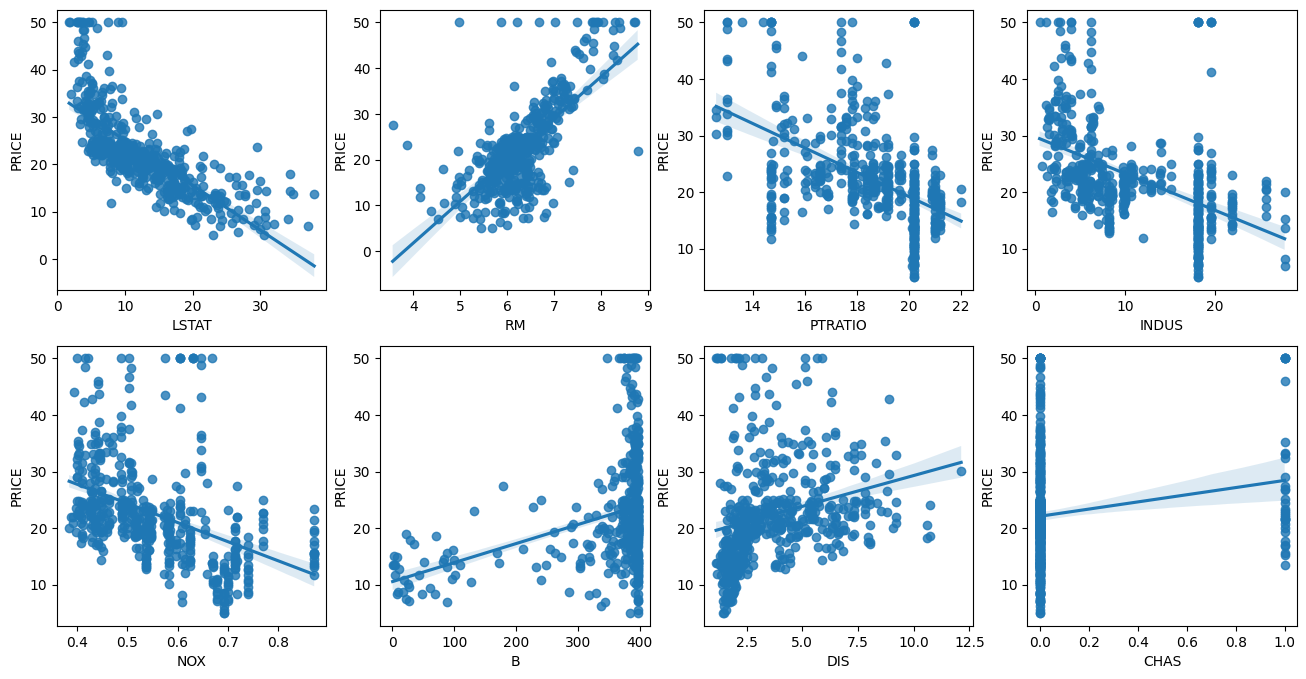

In [8]:
# 2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)

# lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','ZN','AGE','RAD']
lm_features = ['LSTAT','RM','PTRATIO','INDUS','NOX','B','DIS','CHAS']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

> * RM 방 개수가 많으면 주택 가격에 영향을 주고 우상향(양의 상관관계)
> * LSTAT 강한 음의상관관계, 하위계층비율이 높으면 주택가격은 내려가는 가는 관계
> * CHAS는 명목형 자료형임을 알 수 있음.(0과 1만 존재)

In [9]:
#레이블의 분포
bostonDF['PRICE'].value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.9     1
34.6     1
30.3     1
33.3     1
8.1      1
Name: PRICE, Length: 229, dtype: int64

<AxesSubplot: >

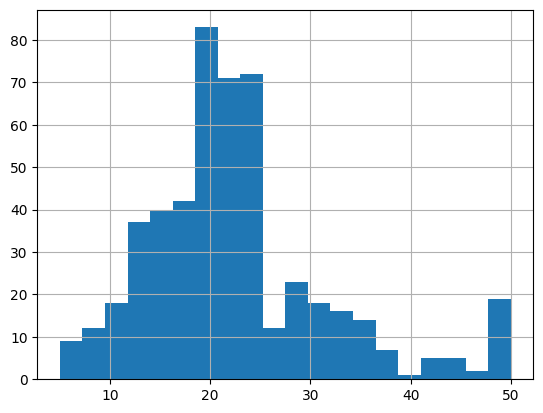

In [10]:
#레이블의 히스토그램
bostonDF['PRICE'].hist(bins=20)

<div class="alert alert-block" style="background-color:#8FBDD3">
<font size="3em" style="font-weight:bold;color:#3f8dbf;"></font>
트리계열은 데이터 스케일링의 필요성이 다소 적으므로 스케일링 과정은 패스한다.  <br>
</div> 

## 모델 학습: 교차검증 + 랜덤포레스트

In [11]:
y_train = bostonDF['PRICE']
X_train = bostonDF.drop('PRICE',axis=1)

In [12]:
type(X_train),type(y_train)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [13]:
X_train.shape

(506, 13)

In [14]:
y_train.shape

(506,)

In [15]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0, n_estimators=1000)

#score:neg_mean_squared_error
#cv:5개


neg_mse_scores = cross_val_score(rf, X_train,y_train, scoring='neg_mean_squared_error',cv=5 )


In [17]:
rmse_scores  = np.sqrt(-1 * neg_mse_scores)

avg_rmse = np.mean(rmse_scores)

print(' 5 교차 검증의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores:  [ -7.88 -13.14 -20.57 -46.23 -18.88]
 5 교차 검증의 개별 RMSE scores :  [2.81 3.63 4.54 6.8  4.34]
 5 교차 검증의 평균 RMSE : 4.423 


In [18]:
# 함수 생성함

def get_model_cv_prediction(model,X_data,y_target):
    #교차검증
    neg_mse_scores = cross_val_score(model, X_data,y_target, scoring='neg_mean_squared_error',cv=5 )    

    #평가
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    
    print(' 5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))

## 모델학습:회귀트리클래스 모두사용

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeRegressor(random_state=0) #RMSE=5.486
rf=RandomForestRegressor(random_state=0 ,n_estimators=1000)
gb=GradientBoostingRegressor(random_state=0,n_estimators=1000)

model=[dt,rf,gb]
for md in model:
   print(md)
   get_model_cv_prediction(md,X_train,y_train)

DecisionTreeRegressor(random_state=0)
 5 교차 검증의 평균 RMSE : 5.859 
RandomForestRegressor(n_estimators=1000, random_state=0)
 5 교차 검증의 평균 RMSE : 4.423 
GradientBoostingRegressor(n_estimators=1000, random_state=0)
 5 교차 검증의 평균 RMSE : 4.269 


### XGBoost 추가

In [20]:
!pip install -U xgboost

In [21]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#xgboost
from xgboost import XGBRegressor

dt=DecisionTreeRegressor(random_state=0) #RMSE=5.486
rf=RandomForestRegressor(random_state=0 ,n_estimators=1000)
gb=GradientBoostingRegressor(random_state=0,n_estimators=1000)
#xgboost
xg = XGBRegressor(n_estimators=1000)


model=[dt,rf,gb,xg]
for md in model:
   print(md.__class__.__name__)
   get_model_cv_prediction(md,X_train,y_train)

DecisionTreeRegressor
 5 교차 검증의 평균 RMSE : 5.859 
RandomForestRegressor
 5 교차 검증의 평균 RMSE : 4.423 
GradientBoostingRegressor
 5 교차 검증의 평균 RMSE : 4.269 
XGBRegressor
 5 교차 검증의 평균 RMSE : 4.251 


> * 역시 XGBoost 라이브러리가 성능이 좋군~~~~

## 변수 중요도

<AxesSubplot: >

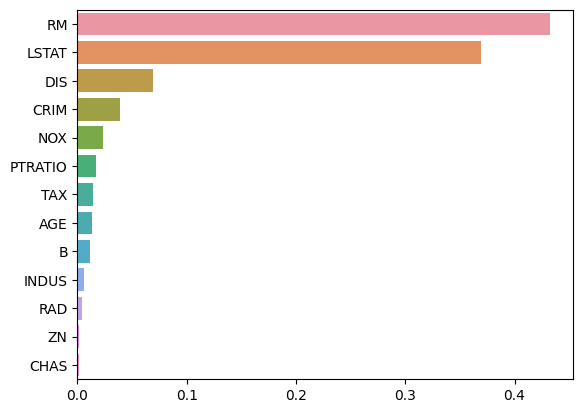

In [22]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)

# 앞 예제에서 만들어진 X_train, y_train 데이터 셋을 적용하여 학습합니다.   
rf_reg.fit(X_train, y_train)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_train.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)


---